In [23]:
import numpy as np
import matplotlib.pyplot as plt

def function(p, t):
    x, y = p
    return y, x ** 3 - x

max_x = 2.0
max_y = 1.0
n = 50

x_range = np.linspace(-max_x, max_x, n)
y_range = np.linspace(-max_y, max_y, n)
x_grid, y_grid = np.meshgrid(x_range, y_range)
t = 0

In [24]:
def phase_portret(x_grid, y_grid):
    nx = x_grid.shape
    ny = y_grid.shape
    u, v = np.zeros(nx), np.zeros(ny)

    for i in range(nx[0]):
        for j in range(ny[0]):
            x = x_grid[i, j]
            y = y_grid[i, j]
            derivative_vector = function([x, y], t)
            u[i, j] = derivative_vector[0]
            v[i, j] = derivative_vector[1]
    return [x_grid, y_grid, u, v]


/tmp/ipykernel_152945/3711782145.py:5: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  solution = odeint(function, point, tspan)


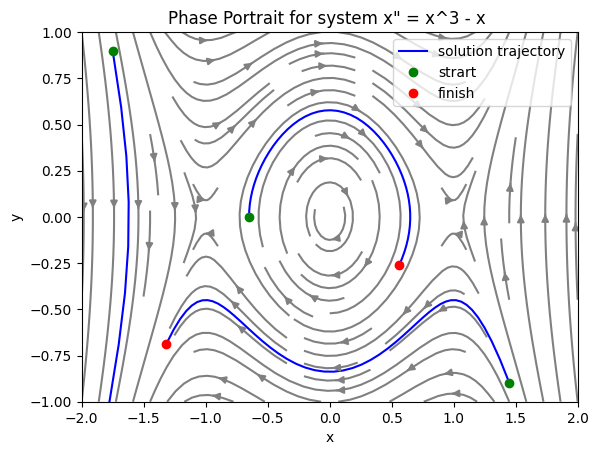

In [26]:
from scipy.integrate import odeint

for point in [[1.45, -0.9], [-1.75, 0.9], [-0.65, 0]]:
    tspan = np.linspace(0, 4.5, 50)
    solution = odeint(function, point, tspan)
    plt.plot(solution[:,0], solution[:,1], 'b-') # path
    plt.plot([solution[0,0]], [solution[0,1]], 'go') # start
    plt.plot([solution[-1,0]], [solution[-1,1]], 'ro') # end

plt.xlim([-max_x, max_x])
plt.ylim([-max_y, max_y])
plt.title("Phase Portrait for system x\" = x^3 - x ")
plt.legend(['solution trajectory', 'strart', 'finish'], loc="best")
plt.xlabel("x")
plt.ylabel("y")
plt.streamplot(*phase_portret(x_grid, y_grid), color='grey')